In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def _read_fastq(input_file):
    # open and read all lines in the fastq file
    read_lines = []
    with open(input_file, 'r') as fastq_file:
        for lines in fastq_file:
            read_lines.append(lines.rstrip('\n'))
        return read_lines

    
all_fastq_lines = _read_fastq('sra_data/SRR17066006.fastq')[:11]
all_fastq_lines

['@SRR17066006.1 1 length=466',
 'TATGTACTTCGTTCAATTATAGATACAGGTTGTTTAACCAAGCGTTGAAACCTTTTGTCCTCTCGTTTTCGCATTTATCGTGAAACGCTTTCGCGTTTTTCGTGCGCCGCTTCACTGAAATCTATCAGGCCGGTAACAAACCTTGTAATGGTGTTGCAGGTTTTAATTGTTACTTTCCTTTACGATCATATAGTTTCCGACCACTTATGGTGTTGGTCACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAAAAGGCACAGGTGTTCTTACTGAGTCTAACAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTTATGAAGCACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATT',
 '+SRR17066006.1 1 length=466',
 "(''&'(),44777>4)))('&$###$$%%&'/078*054447;;;:53.+++,,1*,?====<>=@BCG{4>@@ACCF@??>>AEIBA@A@:;:889;<<?;<:;884))))*578=>?AACBAAA><;;::;<<?BCDCAABAACCDCB?>>==?>@><<==?DEDB??>76:::6844:<;;=>=0/0@@?@?@<*****,/6<<C>;<;;<?=>=<:8;55556@ABA@@@@AABAAB@>?@@CCBEE>;=<<;<===>>>=====>?@?>===@>=<88888;<=068<;;:9:;<ACBA@@@ADFNCBBABBA>>=9999CCB?>>>=??=11112;<>5:766322237;;>?=;::311113>@322107,,578**+66:B0//1?BDGCB=<<;:666)))&%&&&%%&&&'+57899@=====<;;;;<?C@@666@A@@AAD@@???A@:6.

In [16]:
def parse_fastq(input_file):
    sequence_list = []
    fastq_lines = _read_fastq(input_file=input_file)
    # break into groups of 4
    for line in range(0, len(fastq_lines), 4):
        single_sequence = fastq_lines[line:line + 4]
        sequence_list.append(single_sequence)
        
    return sequence_list
  
sequence_list = parse_fastq('sra_data/SRR17066006.fastq')

# check a single list of sequence that has four elements id, reads, id2 and quality
sequence_list[0]

['@SRR17066006.1 1 length=466',
 'TATGTACTTCGTTCAATTATAGATACAGGTTGTTTAACCAAGCGTTGAAACCTTTTGTCCTCTCGTTTTCGCATTTATCGTGAAACGCTTTCGCGTTTTTCGTGCGCCGCTTCACTGAAATCTATCAGGCCGGTAACAAACCTTGTAATGGTGTTGCAGGTTTTAATTGTTACTTTCCTTTACGATCATATAGTTTCCGACCACTTATGGTGTTGGTCACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAAAAGGCACAGGTGTTCTTACTGAGTCTAACAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTTATGAAGCACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATT',
 '+SRR17066006.1 1 length=466',
 "(''&'(),44777>4)))('&$###$$%%&'/078*054447;;;:53.+++,,1*,?====<>=@BCG{4>@@ACCF@??>>AEIBA@A@:;:889;<<?;<:;884))))*578=>?AACBAAA><;;::;<<?BCDCAABAACCDCB?>>==?>@><<==?DEDB??>76:::6844:<;;=>=0/0@@?@?@<*****,/6<<C>;<;;<?=>=<:8;55556@ABA@@@@AABAAB@>?@@CCBEE>;=<<;<===>>>=====>?@?>===@>=<88888;<=068<;;:9:;<ACBA@@@ADFNCBBABBA>>=9999CCB?>>>=??=11112;<>5:766322237;;>?=;::311113>@322107,,578**+66:B0//1?BDGCB=<<;:666)))&%&&&%%&&&'+57899@=====<;;;;<?C@@666@A@@AAD@@???A@:6.

In [17]:
# make a dataframe of the sequence list
sequence_df = pd.DataFrame(sequence_list, columns=['seq_id', 'reads', 'id2', 'seq_qc'])

# Inspect the first 5 rows and check if correct values are present in each attribute or not
sequence_df.head(5)

,seq_id,reads,id2,seq_qc
0,@SRR17066006.1 1 length=466,TATGTACTTCGTTCAATTATAGATACAGGTTGTTTAACCAAGCGTT...,+SRR17066006.1 1 length=466,"(''&'(),44777>4)))('&$###$$%%&'/078*054447;;;:..."
1,@SRR17066006.2 2 length=293,ATCAACATGCTTCGTTCAGTTACGTATTTGGGTGTTTAACCAAGCG...,+SRR17066006.2 2 length=293,"&%$$$%%&&()))...:***,*)%###$%&)+++,)(((((('')*..."
2,@SRR17066006.3 3 length=974,ACGTACTTCGTTCAGTTACATTAGGTGTTTAACCAAGCGTTGAAAC...,+SRR17066006.3 3 length=974,"'(*))&&'',,-6)&&('%$##$$$$%,,5/0//0015<<<&&&&%..."
3,@SRR17066006.4 4 length=361,CTTGTACTTCGTTCAGTTACTGTCATTGGGTGTTTAACCAATGATT...,+SRR17066006.4 4 length=361,",./1766789999,))),+)&$%$$$%$%&'(**+*++*+'&&&&'..."
4,@SRR17066006.5 5 length=1096,TGTCGCGTTTCAATTAGCATTGGGTGTTTTAACCAAGCGTTGAAAC...,+SRR17066006.5 5 length=1096,"%$$%%%%&'+,('&&%%$$$%%%&')78<156557767;97('&)*..."


In [18]:
print(f"The count of reads is {len(sequence_df['reads'])}")

The count of reads is 176406


Histogram of read lengths


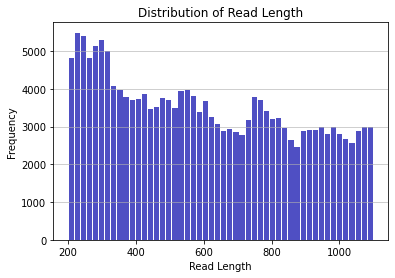

In [19]:
dist = sequence_df['reads'].apply(len)
print("Histogram of read lengths")
plt.hist(x=dist, bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Read Length')
plt.ylabel('Frequency')
plt.title('Distribution of Read Length')
plt.show()
    

In [20]:
print("***read_distribution***")

dist.describe()

***read_distribution***


count    176406.000000
mean        601.286130
std         263.768671
min         200.000000
25%         362.000000
50%         575.000000
75%         820.000000
max        1100.000000
Name: reads, dtype: float64

Text(0.5, 1.0, 'Read length percentiles')

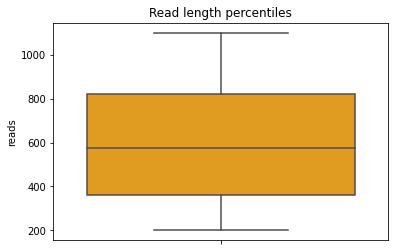

In [27]:
sns.boxplot(y= dist, color = 'orange')
plt.title('Read length percentiles')